## UTILIZING MACHINE LEARNING FOR FORECASTING THE PRICE OF COMMODITIES

## MScFE Capstone Project (Group 4867)

## 1. Machine Learning Approach to Gold Price Forecasting

## Introduction

Gold is a highly traded commodity which has gained interest by many investors and traders for centuries. The can also be liken
to an asset that is used to store the value for money. Asides its use case as a value to store money, countries cantral banks use
it as means to store wealth, repay debts and strengthing the financial capacity of a country.

These factors of Gold has made it the precious metal commodity that is traded and attracted by all. The emergence of machine learning 
has been critical tool to help guild investors in making informed decision on when to buy or sell Gold.

In this project, we are going to be applying some key machine learning algorithm in predicting the price of Gold and comparing the result 
model results.

## Project Flow Chart

![Project Flow Chart](flow2.png)

In [204]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler

from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit

import matplotlib.dates as mdates

from sklearn.base import clone


from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from bayes_opt import bayesian_optimization
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import (
    VotingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    StratifiedKFold,
    cross_val_score,
    cross_validate,
    train_test_split,
)

import warnings
warnings.filterwarnings('ignore')

All our datasets are imported from yfinance using historical data of 18 years from **January 2005** to **December 2023** to train and test our models. 
This project uses Gold spot price as a choice for Gold commdity price forecating. We also integrated SP500, Dow_Jones and US_Dollar Index to see how strongly they impact the pricing of Gold.

In [153]:
import yfinance as yf
import pandas as pd

# Define the ticker symbols
tickers = {
    'Gold': 'GC=F',
    'SP500': '^GSPC',
    'Dow_Jones': '^DJI',
    'US_Dollar_Index': 'DX-Y.NYB'
   
}

# Define the start and end dates
start_date = '2005-01-01'
end_date = '2023-12-31'

# Initialize an empty DataFrame for the consolidated data
consolidated_data = pd.DataFrame()

# Download the stock data
for name, symbol in tickers.items():
    print(f"Downloading data for {name}...")
    try:
        data = yf.download(symbol, start=start_date, end=end_date)
        # Rename columns to include the ticker name
        data.rename(columns={col: f"{name}_{col}" for col in data.columns}, inplace=True)
        if consolidated_data.empty:
            consolidated_data = data
        else:
            # Merge with the consolidated DataFrame
            consolidated_data = consolidated_data.join(data, how='outer')
        print(f"Data for {name} downloaded.")
    except Exception as e:
        print(f"Failed to download data for {name}: {e}")

# Save the consolidated data to a CSV file
consolidated_data.to_csv('Gold_Data.csv')
print("Consolidated data saved ")


[*********************100%***********************]  1 of 1 completed
Data for Gold downloaded.
[*********************100%***********************]  1 of 1 completed
Data for SP500 downloaded.
[*********************100%***********************]  1 of 1 completed
Data for Dow_Jones downloaded.
[*********************100%***********************]  1 of 1 completed
Data for US_Dollar_Index downloaded.
Consolidated data saved 


In [154]:
data = pd.read_csv("Gold_Data.csv",index_col='Date',parse_dates=True,infer_datetime_format=True)


In [155]:
data.head()

,Gold_Open,Gold_High,Gold_Low,Gold_Close,Gold_Adj Close,Gold_Volume,SP500_Open,SP500_High,SP500_Low,SP500_Close,...,Dow_Jones_Low,Dow_Jones_Close,Dow_Jones_Adj Close,Dow_Jones_Volume,US_Dollar_Index_Open,US_Dollar_Index_High,US_Dollar_Index_Low,US_Dollar_Index_Close,US_Dollar_Index_Adj Close,US_Dollar_Index_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,431.000000,431.000000,431.000000,428.700012,428.700012,4.0,1211.920044,1217.800049,1200.319946,1202.079956,...,10710.070312,10729.429688,10729.429688,270620000.0,81.050003,81.760002,80.769997,81.300003,81.300003,0.0
2005-01-04,428.500000,428.500000,428.500000,428.500000,428.500000,108.0,1202.079956,1205.839966,1185.390015,1188.050049,...,10605.150391,10630.780273,10630.780273,293280000.0,81.360001,82.709999,81.180000,82.570000,82.570000,0.0
2005-01-05,425.700012,425.700012,425.700012,426.600006,426.600006,2.0,1188.050049,1192.729980,1183.719971,1183.739990,...,10597.750000,10597.830078,10597.830078,263550000.0,82.489998,82.919998,82.300003,82.540001,82.540001,0.0
2005-01-06,421.000000,421.000000,421.000000,421.000000,421.000000,1.0,1183.739990,1191.630005,1183.270020,1187.890015,...,10589.330078,10622.879883,10622.879883,232850000.0,82.449997,83.230003,82.430000,83.150002,83.150002,0.0
2005-01-07,423.700012,423.700012,418.700012,418.899994,418.899994,1.0,1187.890015,1192.199951,1182.160034,1186.189941,...,10571.740234,10603.959961,10603.959961,283770000.0,83.070000,83.790001,82.610001,83.610001,83.610001,0.0


In [156]:
data.dropna(inplace=True)

In [157]:
data.head()

,Gold_Open,Gold_High,Gold_Low,Gold_Close,Gold_Adj Close,Gold_Volume,SP500_Open,SP500_High,SP500_Low,SP500_Close,...,Dow_Jones_Low,Dow_Jones_Close,Dow_Jones_Adj Close,Dow_Jones_Volume,US_Dollar_Index_Open,US_Dollar_Index_High,US_Dollar_Index_Low,US_Dollar_Index_Close,US_Dollar_Index_Adj Close,US_Dollar_Index_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,431.000000,431.000000,431.000000,428.700012,428.700012,4.0,1211.920044,1217.800049,1200.319946,1202.079956,...,10710.070312,10729.429688,10729.429688,270620000.0,81.050003,81.760002,80.769997,81.300003,81.300003,0.0
2005-01-04,428.500000,428.500000,428.500000,428.500000,428.500000,108.0,1202.079956,1205.839966,1185.390015,1188.050049,...,10605.150391,10630.780273,10630.780273,293280000.0,81.360001,82.709999,81.180000,82.570000,82.570000,0.0
2005-01-05,425.700012,425.700012,425.700012,426.600006,426.600006,2.0,1188.050049,1192.729980,1183.719971,1183.739990,...,10597.750000,10597.830078,10597.830078,263550000.0,82.489998,82.919998,82.300003,82.540001,82.540001,0.0
2005-01-06,421.000000,421.000000,421.000000,421.000000,421.000000,1.0,1183.739990,1191.630005,1183.270020,1187.890015,...,10589.330078,10622.879883,10622.879883,232850000.0,82.449997,83.230003,82.430000,83.150002,83.150002,0.0
2005-01-07,423.700012,423.700012,418.700012,418.899994,418.899994,1.0,1187.890015,1192.199951,1182.160034,1186.189941,...,10571.740234,10603.959961,10603.959961,283770000.0,83.070000,83.790001,82.610001,83.610001,83.610001,0.0


In [158]:
data.shape

(4772, 24)

In [159]:
data.describe()

,Gold_Open,Gold_High,Gold_Low,Gold_Close,Gold_Adj Close,Gold_Volume,SP500_Open,SP500_High,SP500_Low,SP500_Close,...,Dow_Jones_Low,Dow_Jones_Close,Dow_Jones_Adj Close,Dow_Jones_Volume,US_Dollar_Index_Open,US_Dollar_Index_High,US_Dollar_Index_Low,US_Dollar_Index_Close,US_Dollar_Index_Adj Close,US_Dollar_Index_Volume
count,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,...,4772.000000,4772.000000,4772.000000,4.772000e+03,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4.772000e+03
mean,1283.764690,1290.291744,1276.855826,1283.640633,1283.640633,4912.339271,2192.681407,2205.149749,2179.384124,2193.096567,...,18798.106618,18913.632983,18913.632983,2.455666e+08,88.971595,89.299331,88.663502,88.984120,88.984120,4.880553e+03
std,421.931235,424.126313,419.629665,421.884148,421.884148,26674.963065,1088.426147,1094.182366,1082.418525,1088.650141,...,8346.479571,8390.251586,8390.251586,1.232455e+08,9.181640,9.192672,9.163266,9.181216,9.181216,2.444481e+05
min,412.000000,413.600006,410.100006,412.600006,412.600006,0.000000,679.280029,695.270020,666.789978,676.530029,...,6469.950195,6547.049805,6547.049805,8.410000e+06,71.330002,71.690002,70.699997,71.330002,71.330002,0.000000e+00
25%,1031.274963,1042.099976,1025.574997,1033.499969,1033.499969,33.000000,1301.044952,1308.289978,1294.007507,1301.377502,...,11867.375244,11968.772705,11968.772705,1.425700e+08,80.730003,81.010002,80.497499,80.730003,80.730003,0.000000e+00
50%,1282.350037,1287.000000,1277.500000,1281.950012,1281.950012,130.000000,1906.674988,1920.280029,1886.775024,1906.515015,...,16378.705078,16460.535156,16460.535156,2.405100e+08,89.349998,89.665001,89.005001,89.339996,89.339996,0.000000e+00
75%,1649.850037,1659.925018,1638.199982,1648.699951,1648.699951,449.000000,2842.370056,2857.172424,2825.419922,2843.802490,...,25497.511719,25675.070801,25675.070801,3.174600e+08,96.522497,96.790001,96.220001,96.519997,96.519997,0.000000e+00
max,2081.600098,2130.199951,2066.500000,2081.899902,2081.899902,386334.000000,4804.509766,4818.620117,4780.979980,4796.560059,...,37650.980469,37710.101562,37710.101562,9.159900e+08,114.190002,114.779999,113.330002,114.110001,114.110001,1.429000e+07


In [160]:
data.isnull().values.any()

False

In [161]:
data.columns

Index(['Gold_Open', 'Gold_High', 'Gold_Low', 'Gold_Close', 'Gold_Adj Close',
       'Gold_Volume', 'SP500_Open', 'SP500_High', 'SP500_Low', 'SP500_Close',
       'SP500_Adj Close', 'SP500_Volume', 'Dow_Jones_Open', 'Dow_Jones_High',
       'Dow_Jones_Low', 'Dow_Jones_Close', 'Dow_Jones_Adj Close',
       'Dow_Jones_Volume', 'US_Dollar_Index_Open', 'US_Dollar_Index_High',
       'US_Dollar_Index_Low', 'US_Dollar_Index_Close',
       'US_Dollar_Index_Adj Close', 'US_Dollar_Index_Volume'],
      dtype='object')

## Exploratory Data Analysis (EDA)

In [162]:
Gold_Adj_close = data['Gold_Adj Close']
SP500_Adj_close = data['SP500_Adj Close']
Dow_Jones_Adj_close = data['Dow_Jones_Adj Close']
US_Dollar_Index_Adj_close = data['US_Dollar_Index_Adj Close']


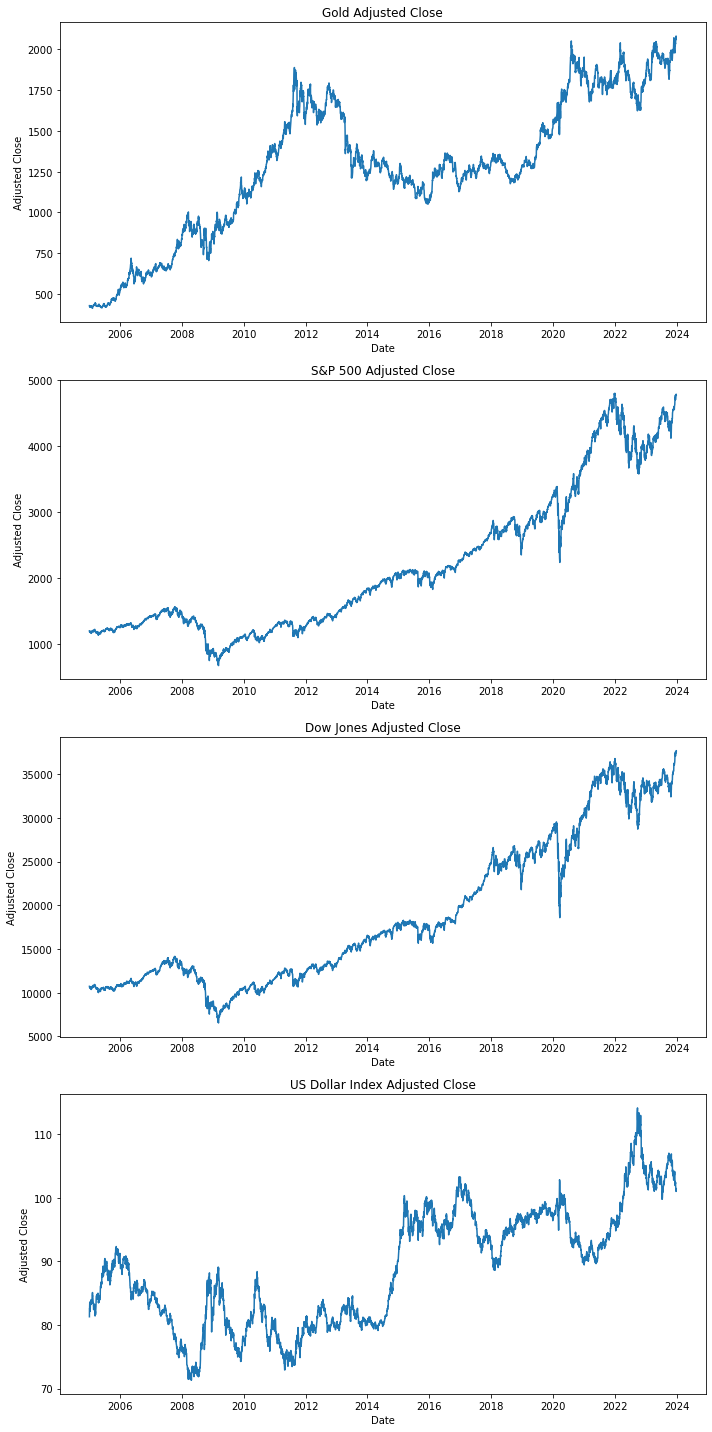

In [163]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 20))

# Plot each data series on a separate subplot
axes[0].plot(Gold_Adj_close)
axes[0].set_title('Gold Adjusted Close')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Adjusted Close')

axes[1].plot(SP500_Adj_close)
axes[1].set_title('S&P 500 Adjusted Close')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Adjusted Close')

axes[2].plot(Dow_Jones_Adj_close)
axes[2].set_title('Dow Jones Adjusted Close')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Adjusted Close')

axes[3].plot(US_Dollar_Index_Adj_close)
axes[3].set_title('US Dollar Index Adjusted Close')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Adjusted Close')


# Adjust layout for better viewing
plt.tight_layout()
plt.show()



In [164]:
df_Price = pd.DataFrame({'Gold':Gold_Adj_close, 'Dollar Index':US_Dollar_Index_Adj_close,'SP500': SP500_Adj_close, 'Dow Jones':Dow_Jones_Adj_close})

<AxesSubplot:>

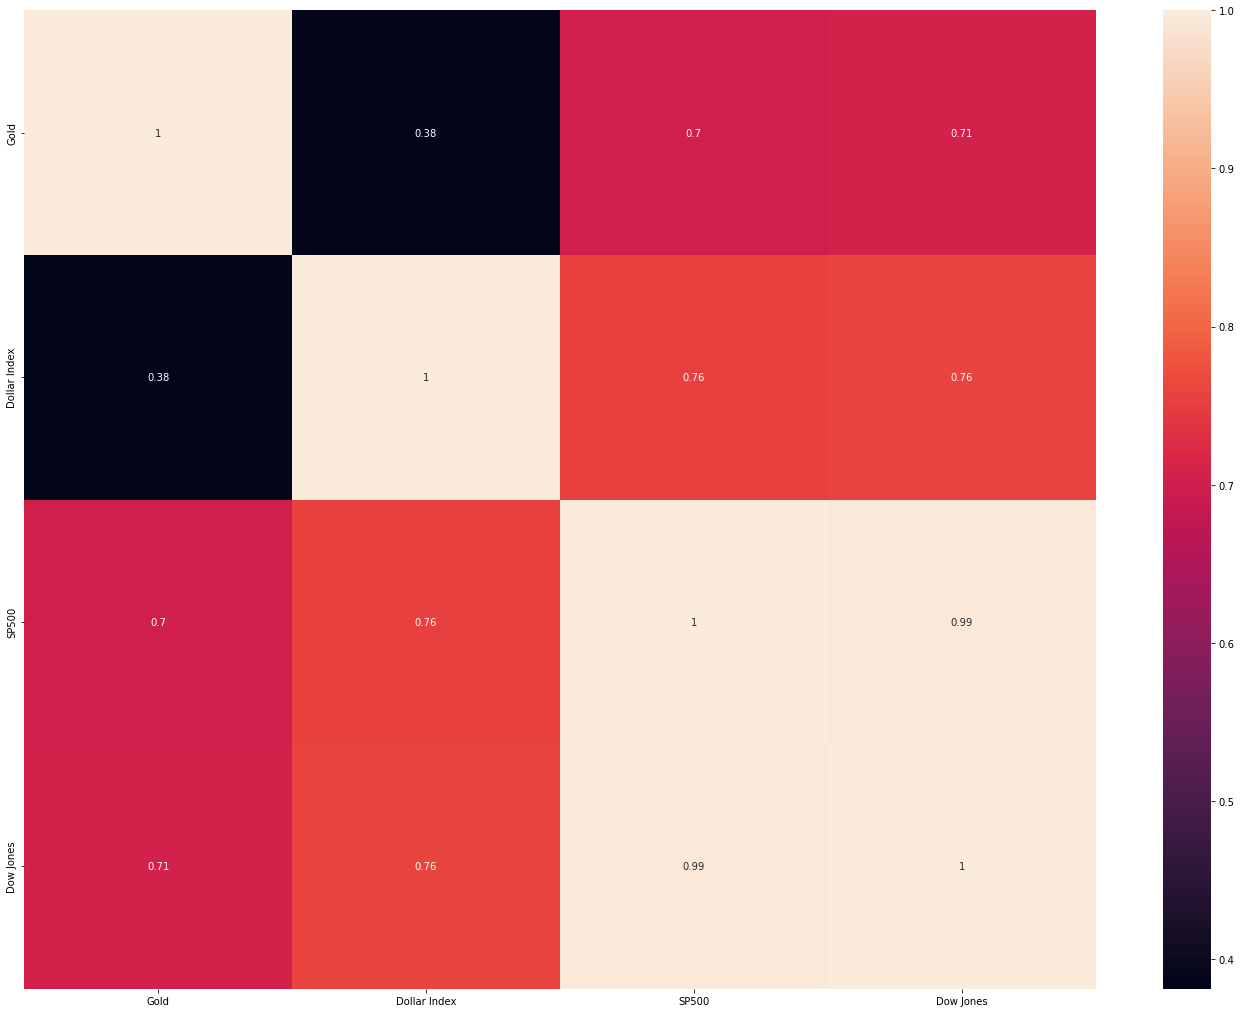

In [165]:
plt.figure(figsize=(24,18)) 
sns.heatmap(df_Price.corr(), annot=True) 

From the correlation plot, it shows clearly that there exist a strong postive correlation between Gold spot price, SP500 and Dow Jones, but there is a week correlation between Gold and Dollar index. With this, it is safe to drop the dollar index dataset.

In [166]:
#Creating a function to compute daily return 
def compute_daily_returns(df):
    daily_return = (df / df.shift(1)) - 1
    daily_return[0] = 0
    return daily_return

In [167]:
Gold_return = compute_daily_returns(Gold_Adj_close)
SP500_return = compute_daily_returns(SP500_Adj_close)
Dow_Jones_return = compute_daily_returns(Dow_Jones_Adj_close)

Text(0, 0.5, 'Return')

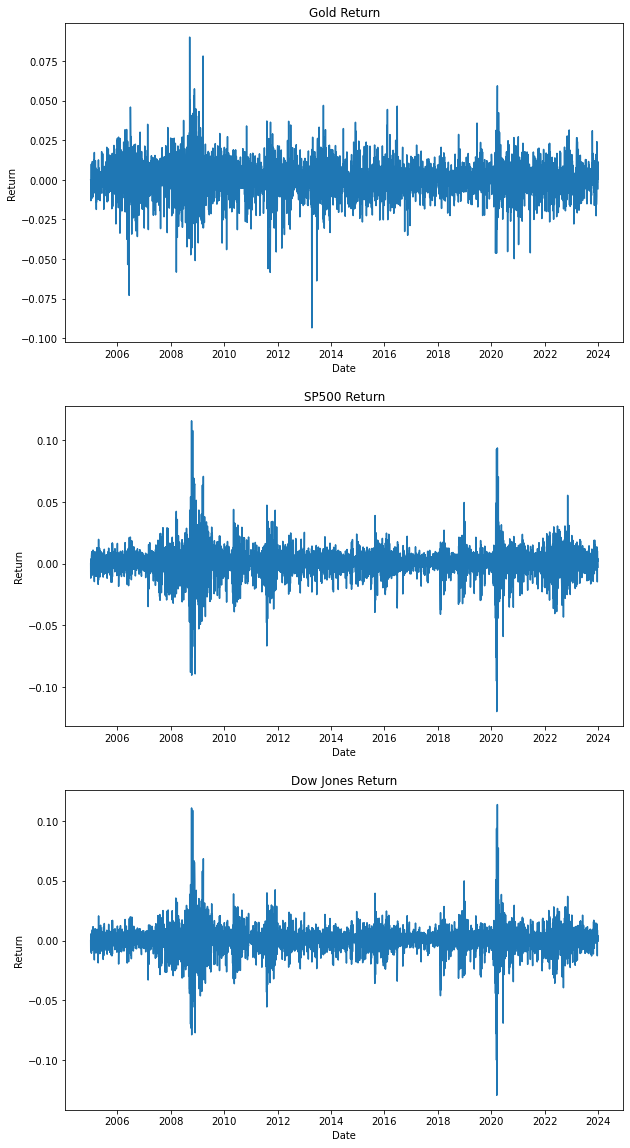

In [168]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

# Plot each data series on a separate subplot
axes[0].plot(Gold_return)
axes[0].set_title('Gold Return')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Return')

axes[1].plot(SP500_return)
axes[1].set_title('SP500 Return')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Return')

axes[2].plot(Dow_Jones_return)
axes[2].set_title('Dow Jones Return')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Return')

### Observation:

In [169]:
df_return = pd.DataFrame({'Gold':Gold_return, 'SPY':SP500_return, 'Dow_Jones':Dow_Jones_return})

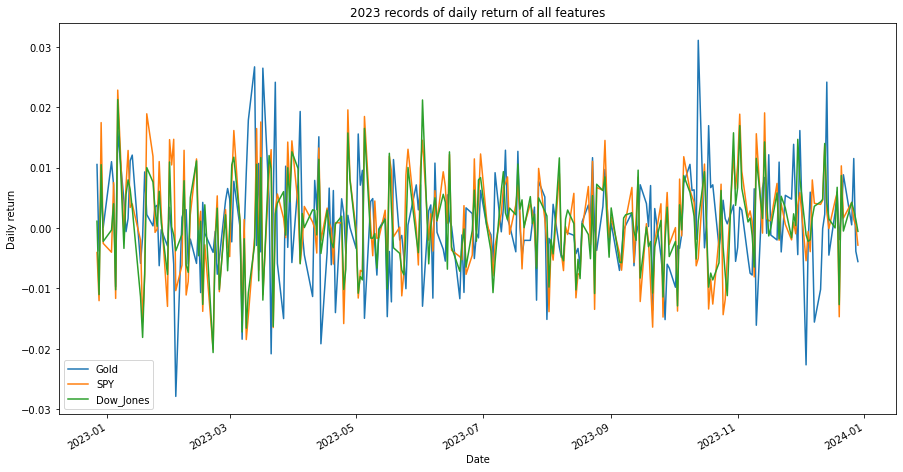

In [170]:
returns = df_return[-254:].plot(title='2023 records of daily return of all features',figsize=(15,8))

returns.set_ylabel('Daily return')
returns.legend(loc='lower left')
plt.show()

## Statistical Analysis

In [28]:
import matplotlib.pyplot as plt

def plot_statistics_and_histogram(data, column_name):
    # Ensure column_name is in the DataFrame
    if column_name not in data.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return

    # Computing mean, standard deviation, and kurtosis
    mean = data[column_name].mean()
    std = data[column_name].std()
    kurt = data[column_name].kurtosis()
    
    # Printing statistics
    print(f'Mean for {column_name}: {mean}')
    print(f'Standard Deviation for {column_name}: {std}')
    print(f'Kurtosis for {column_name}: {kurt}')
    
    # Plotting Histogram
    plt.figure(figsize=(10, 6))
    data[column_name].hist(bins=20)
    
    # Drawing lines for mean and standard deviations
    plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
    plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
    plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
    
    plt.title(f"Mean, Standard Deviation, and Kurtosis of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean for Gold: 0.00039218269677160274
Standard Deviation for Gold: 0.011212444424907137
Kurtosis for Gold: 5.428039005909465


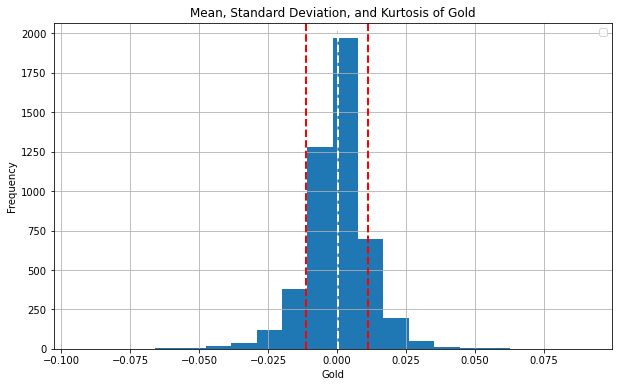

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean for SPY: 0.00036423338312537734
Standard Deviation for SPY: 0.012261327785285332
Kurtosis for SPY: 12.610430582612135


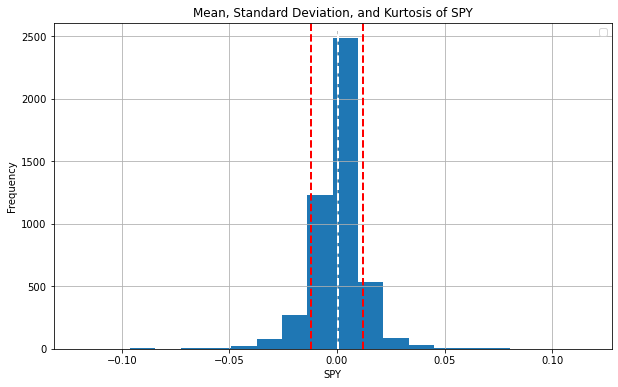

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean for Dow_Jones: 0.00033088138239196986
Standard Deviation for Dow_Jones: 0.011612737694434718
Kurtosis for Dow_Jones: 15.634117238525198


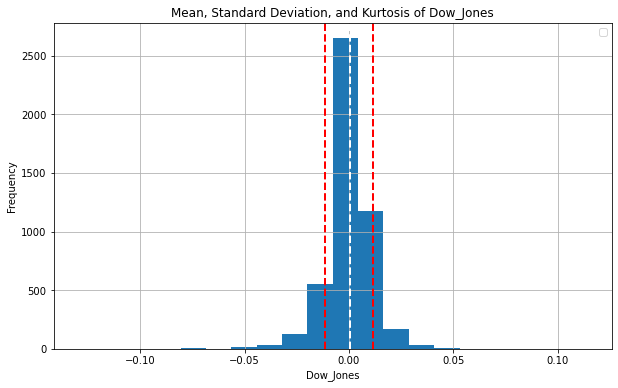

In [29]:
plot_statistics_and_histogram(df_return, 'Gold')
plot_statistics_and_histogram(df_return, 'SPY')
plot_statistics_and_histogram(df_return, 'Dow_Jones')

## Technical Indicators

### Moving Average (MA)

Moving Average: is a time series trend indicator that is derived by adding up data points with a specific specifed time period and dividing the total respective data point within the period. This means that as new data points are added, the oldest data points are dropped, making the average "move" over time.

MA = (A1 + A2 + ... + An)/n

### Exponential Moving Average (EMA)

Exponential Moving Average (EMA) is a type of moving average that places a greater weight on the most recent data points. Unlike the simple moving average (SMA) that assigns equal weight to all values, EMA provides a more responsive way to analyze data trends over time.
The formula for calculating the weighting multiplier is as follows:

Weighting Multiplier = [2 / (Selected Time Period + 1)]

EMA = Current EMA = [Closing Price – EMA (Previous Time Period)] x Weighting Multiplier + EMA (Previous Time Period)


###  Rate of Change (RC):

RC is the rate of change of variable over a specific period

RC = (D2 - D1)/T

D represent distant point

T represent time for change to occur

### Price Momentum (MOM):

Price momentum is measured by continually taking price differences for a fixed time interval. 

Momentum=V−Vx

where:

V = Latest price

Vx = Closing price

x = Number of days ago

### Relative Strength Index (RSI)

RSI measures the speed and magnitude of a security's recent price changes to evaluate overvalued or undervalued conditions in the price of that security.

RSI = 100 – [100 / ( 1 + (Average of Upward Price Change / Average of Downward Price Change ) ) ]

### Stochastic Oscillator (STOK):

In [171]:
# calculation of rate of change

def RC(df, n=15):
    M = df.diff(n - 1)
    N = df.shift(n - 1)
    RC = pd.Series(((M / N) * 100), name="RC_" + str(15))
    return RC

# Calculating stochastic oscillator

def STOK(close, low, high, n=15):
    STOK = (
        (close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())
    ) * 100
    return STOK


def STOD(close, low, high, n=15):
    STOK = (
        (close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())
    ) * 100
    STOD = STOK.rolling(3).mean()
    return STOD

# Calculating realtive strength Index

def RSI(df, periods=15):
    # wilder's RSI
    delta = df.diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    rUp = up.ewm(com=periods,adjust=False).mean()
    rDown = down.ewm(com=periods, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)
    return rsi

# Calculation of price momentum
def MOM(df, n=15):
    MOM = pd.Series(df.diff(n), name="Momentum_" + str(n))
    return MOM

# Calculating Moving Average

def EMA(df, n):
    EMA = pd.Series(df.ewm(span=n, min_periods=n).mean(), name="EMA_" + str(n))
    return EMA

def SMA(df, n):
    SMA = df.rolling(window=n, min_periods=n, center=False).mean()
    return SMA

# Calculating Standard deviation
def Stdev(df, n=15):
    STDEV = df.rolling(n).std()
    return STDEV

In [172]:
# Rate of Change
data['RC15'] = RC(data["Gold_Adj Close"])

# stochastic oscillator
data['SK15'] = STOK(data["Gold_Adj Close"], data["Gold_Low"], data["Gold_High"], 15)
data['SD15'] = STOD(data["Gold_Adj Close"], data["Gold_Low"], data["Gold_High"], 15)

# Momentum 
data['MOM15'] = MOM(data["Gold_Adj Close"])

# Relative Strength
data['RSI'] = RSI(data["Gold_Adj Close"])

# Standard deviation
data['STDEV'] = Stdev(data["Gold_Adj Close"])

# Open_Close
data['Open_Close'] = data.Gold_Open - data.Gold_Close

# High_low
data['High_Low'] = data.Gold_High - data.Gold_Low

# Exponential Moving Average 
data['EMA15'] = EMA(data["Gold_Adj Close"],15)
data['EMA30'] = EMA(data["Gold_Adj Close"],30)
data['EMA50'] = EMA(data["Gold_Adj Close"],50)
data['EMA200'] = EMA(data["Gold_Adj Close"],200)


# Simple Moving Average 
data['SMA15'] = SMA(data["Gold_Adj Close"],15)
data['SMA30'] = SMA(data["Gold_Adj Close"],30)
data['SMA50'] = SMA(data["Gold_Adj Close"],50)
data['SMA200'] = SMA(data["Gold_Adj Close"],200)

We are going to be treating our model as a classification problem. The target variable will be the percentage change of gold on a daily interval. We are going to group positive returns to be 1 while neagtive returns to be 0.

In [173]:
data["Returns"] = Gold_return

In [174]:
data["Direction"] = np.where(data["Returns"]>=0, 1, 0)

In [175]:
Gold_Data = data.dropna(axis=0)

In [176]:
Gold_Data.describe()

,Gold_Open,Gold_High,Gold_Low,Gold_Close,Gold_Adj Close,Gold_Volume,SP500_Open,SP500_High,SP500_Low,SP500_Close,...,EMA15,EMA30,EMA50,EMA200,SMA15,SMA30,SMA50,SMA200,Returns,Direction
count,4573.000000,4573.000000,4573.000000,4573.000000,4573.000000,4573.000000,4573.000000,4573.000000,4573.000000,4573.000000,...,4573.000000,4573.000000,4573.000000,4573.000000,4573.000000,4573.000000,4573.000000,4573.000000,4573.000000,4573.000000
mean,1320.730330,1327.501641,1313.553160,1320.591821,1320.591821,5054.077848,2235.901547,2248.680818,2222.257527,2236.338670,...,1318.183368,1315.649061,1312.312272,1288.066153,1318.175862,1315.627958,1312.254344,1287.517991,0.000391,0.527444
std,391.139124,393.056334,389.156512,391.119074,391.119074,27178.472248,1091.516033,1097.211068,1085.593357,1091.728320,...,390.572536,390.305782,390.154177,389.054357,390.832086,390.709788,390.770331,392.794568,0.011358,0.499301
min,455.299988,455.299988,455.299988,456.299988,456.299988,0.000000,679.280029,695.270020,666.789978,676.530029,...,463.917904,463.860038,457.582203,441.333639,464.686664,465.430004,455.486002,434.638500,-0.093538,0.000000
25%,1115.199951,1121.300049,1106.800049,1114.199951,1114.199951,37.000000,1329.510010,1336.739990,1321.060059,1329.150024,...,1115.708191,1117.870511,1110.334745,1084.298138,1116.266667,1114.756649,1115.292002,1082.502001,-0.004936,0.000000
50%,1291.500000,1295.199951,1285.500000,1290.699951,1290.699951,138.000000,1973.060059,1982.520020,1964.040039,1972.829956,...,1293.588699,1293.385717,1291.436393,1273.798659,1293.386662,1292.180005,1292.014009,1277.011497,0.000443,1.000000
75%,1661.800049,1671.000000,1653.500000,1662.300049,1662.300049,460.000000,2884.689941,2894.449951,2867.290039,2882.699951,...,1669.725857,1673.917850,1675.493645,1625.939130,1665.700000,1667.670007,1671.224004,1647.585001,0.006233,1.000000
max,2081.600098,2130.199951,2066.500000,2081.899902,2081.899902,386334.000000,4804.509766,4818.620117,4780.979980,4796.560059,...,2042.689534,2022.901739,2002.851761,1944.005993,2030.633325,2023.543327,2003.395994,1960.274498,0.090277,1.000000


In [177]:
Gold_Data.groupby(["Direction"]).size()

Direction
0    2161
1    2412
dtype: int64

In [178]:
Gold_Data.columns

Index(['Gold_Open', 'Gold_High', 'Gold_Low', 'Gold_Close', 'Gold_Adj Close',
       'Gold_Volume', 'SP500_Open', 'SP500_High', 'SP500_Low', 'SP500_Close',
       'SP500_Adj Close', 'SP500_Volume', 'Dow_Jones_Open', 'Dow_Jones_High',
       'Dow_Jones_Low', 'Dow_Jones_Close', 'Dow_Jones_Adj Close',
       'Dow_Jones_Volume', 'US_Dollar_Index_Open', 'US_Dollar_Index_High',
       'US_Dollar_Index_Low', 'US_Dollar_Index_Close',
       'US_Dollar_Index_Adj Close', 'US_Dollar_Index_Volume', 'RC15', 'SK15',
       'SD15', 'MOM15', 'RSI', 'STDEV', 'Open_Close', 'High_Low', 'EMA15',
       'EMA30', 'EMA50', 'EMA200', 'SMA15', 'SMA30', 'SMA50', 'SMA200',
       'Returns', 'Direction'],
      dtype='object')

In [179]:
#Target column
Gold_Data_Target =pd.DataFrame(Gold_Data['Direction'])

#Feature columns
Gold_Data_Features = Gold_Data[["Gold_Volume", "Gold_Adj Close","SP500_Volume", "SP500_Adj Close", "Dow_Jones_Volume", "Dow_Jones_Adj Close",
                                "RC15", "SK15", "SD15", "MOM15", "RSI", "STDEV", "Open_Close", 
                                "High_Low", "EMA15", "EMA30", "EMA50", "EMA200", "SMA15", "SMA30", "SMA50", "SMA200"]]

In [180]:
Gold_Data_Features.tail()

,Gold_Volume,Gold_Adj Close,SP500_Volume,SP500_Adj Close,Dow_Jones_Volume,Dow_Jones_Adj Close,RC15,SK15,SD15,MOM15,...,Open_Close,High_Low,EMA15,EMA30,EMA50,EMA200,SMA15,SMA30,SMA50,SMA200
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-22,202.0,2057.100098,3.046770e+09,4754.629883,252970000.0,37385.968750,1.630360,52.899564,44.179583,-13.899902,...,-1.400146,16.500000,2024.045432,2008.771607,1991.352555,1938.900553,2019.073348,2007.663338,1992.398000,1956.924999
2023-12-26,64.0,2058.199951,2.513910e+09,4774.750000,212420000.0,37545.328125,1.966805,88.794018,60.998375,34.099976,...,1.800049,6.600098,2028.314747,2011.960533,1993.974021,1940.087611,2021.346680,2011.850004,1995.013999,1957.905999
2023-12-27,586.0,2081.899902,2.748450e+09,4781.580078,245530000.0,37656.519531,2.531391,100.000000,80.564527,63.399902,...,-14.599854,17.099854,2035.012891,2016.472750,1997.422095,1941.498679,2025.573340,2016.396667,1998.229998,1958.756998
2023-12-28,338.0,2073.899902,2.698860e+09,4783.350098,199550000.0,37710.101562,2.167588,88.067551,92.287189,43.399902,...,7.700195,20.800049,2039.873768,2020.177727,2000.421225,1942.816104,2028.466667,2020.133329,2001.253997,1959.595498
2023-12-29,47.0,2062.399902,3.126060e+09,4769.830078,234570000.0,37689.539062,3.207719,77.827128,88.631559,32.499878,...,5.600098,6.799805,2042.689534,2022.901739,2002.851761,1944.005993,2030.633325,2023.543327,2003.395994,1960.274498


In [181]:
Gold_Data_Target.tail()

,Direction
Date,
2023-12-22,1
2023-12-26,1
2023-12-27,1
2023-12-28,0
2023-12-29,0


## Feature Scaling

Explanation:Normalizing/ feture scaling the feature varibales helps to ..... 
Formula

This will be carried out using sklearn MinMaxscaler function.

In [182]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(Gold_Data_Features)

In [183]:
Normalized_Data = pd.DataFrame(columns=Gold_Data_Features.columns, data=feature_minmax_transform_data, index=Gold_Data_Features.index)
Normalized_Data.head()

,Gold_Volume,Gold_Adj Close,SP500_Volume,SP500_Adj Close,Dow_Jones_Volume,Dow_Jones_Adj Close,RC15,SK15,SD15,MOM15,...,Open_Close,High_Low,EMA15,EMA30,EMA50,EMA200,SMA15,SMA30,SMA50,SMA200
Date,,,,,,,,,,,,,,,,,,,,,
2005-10-20,0.000023,0.002891,0.167993,0.121667,0.359682,0.119823,0.444795,0.186231,0.196658,0.490107,...,0.405547,0.038487,0.002742,0.000000,0.000000,0.000000,0.003436,0.000000,0.000000,0.000000
2005-10-21,0.000023,0.006582,0.154219,0.122101,0.385112,0.117709,0.496195,0.409709,0.134224,0.506807,...,0.358451,0.008627,0.002643,0.000130,0.000239,0.000196,0.003350,0.000385,0.000278,0.000126
2005-10-24,0.000005,0.005352,0.128509,0.126904,0.281275,0.123157,0.484580,0.335216,0.207771,0.508441,...,0.387232,0.008627,0.002398,0.000169,0.000418,0.000375,0.003304,0.000712,0.000525,0.000245
2005-10-25,0.000047,0.010150,0.139304,0.126215,0.262842,0.122928,0.529879,0.625737,0.400627,0.522599,...,0.343799,0.068348,0.002802,0.000528,0.000788,0.000610,0.003589,0.001284,0.000920,0.000397
2005-10-26,0.000412,0.009166,0.153920,0.124963,0.284713,0.121873,0.486953,0.566144,0.469271,0.519695,...,0.391418,0.021898,0.003028,0.000797,0.001103,0.000831,0.003806,0.001741,0.001244,0.000561


In [184]:
Normalized_Data.shape

(4573, 22)

In [185]:
Gold_Data_Target.shape

(4573, 1)

In [186]:
Gold_Data_Target = Gold_Data_Target.shift(-1)
Val_target = Gold_Data_Target[-200:-1]
Gold_Data_Target = Gold_Data_Target[:-200]

Val_features = Normalized_Data[-200:-1]
Normalized_Data = Normalized_Data[:-200]

In [187]:
print('validation target shape :', Val_target.shape)
print('validation features shape :', Val_features.shape)

validation target shape : (199, 1)
validation features shape : (199, 22)


In [188]:
print('New features shape :', Normalized_Data.shape)
print('New target shape :', Gold_Data_Target.shape)

New features shape : (4373, 22)
New target shape : (4373, 1)


## Train Test Split

In [189]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(Normalized_Data):
        X_train, X_test = Normalized_Data[:len(train_index)], Normalized_Data[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = Gold_Data_Target[:len(train_index)], Gold_Data_Target[len(train_index): (len(train_index)+len(test_index))]
       

In [190]:
print("X_train shape :", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape :", y_train.shape)
print("y_train shape :", y_test.shape)

X_train shape : (3976, 22)
X_test shape : (397, 22)
y_train shape : (3976, 1)
y_train shape : (397, 1)


In [206]:
# Define your models
models = [
    ("LR", LogisticRegression(n_jobs=-1, max_iter=2000)),
    ("SVC", SVC()),
    ("LDA", LinearDiscriminantAnalysis()),
    ("KNN", KNeighborsClassifier(n_neighbors=15)),
    ("CART", DecisionTreeClassifier()),
    ("NB", GaussianNB()),
    ("NN", MLPClassifier(max_iter=1000)),  # Increased max_iter for convergence
    ("AB", AdaBoostClassifier()),
    ("GBM", GradientBoostingClassifier()),
    ("RF", RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=None, random_state=42))
]

# Define number of splits for TimeSeriesSplit
n_splits = 5  # Adjust based on your dataset size
ts_split = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store results
results = []
names = []

# Loop through each model, perform cross-validation, and store results
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=ts_split, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})"
    print(msg)

LR: 0.503 (0.033)
SVC: 0.497 (0.039)
LDA: 0.522 (0.034)
KNN: 0.509 (0.023)
CART: 0.486 (0.029)
NB: 0.506 (0.034)
NN: 0.505 (0.029)
AB: 0.490 (0.019)
GBM: 0.480 (0.034)
RF: 0.475 (0.024)


The LinearDiscriminantAnalysis show a better result compared to the rest of the model. This will be used further as the selected as our prefered model.

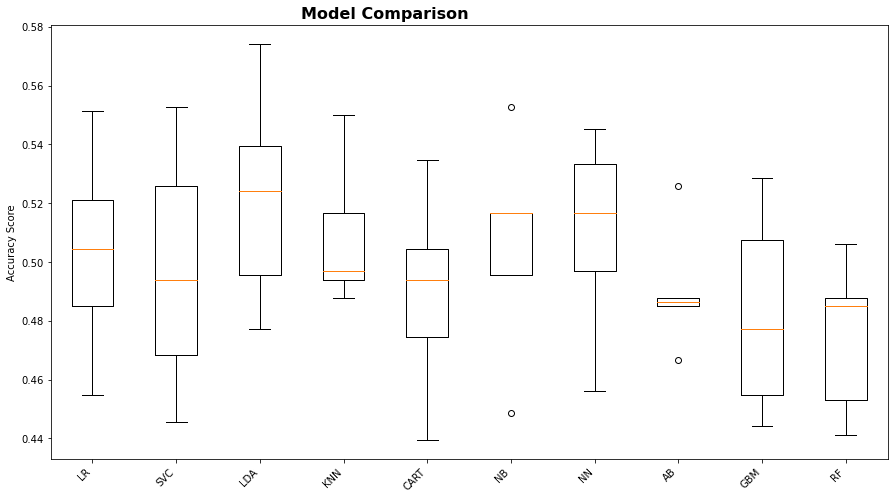

In [197]:
# Create a boxplot to compare algorithms
fig = plt.figure(figsize=(15, 8))  # Set figure size
ax = fig.add_subplot(111)
ax.boxplot(results)

# Set the tick labels to the names of the algorithms
ax.set_xticklabels(names, rotation=45, ha='right')

# Add titles and labels
plt.title('Model Comparison', fontsize=16, fontweight='bold', horizontalalignment='right')
plt.ylabel('Accuracy Score')

# Show the plot
plt.show()

In [207]:
pipeline = Pipeline([
    ('classifier', LinearDiscriminantAnalysis())
])

# Define the grid of values to search for hyperparameters
param_grid = {
    'classifier__solver': ['svd', 'lsqr', 'eigen'],  # 'svd' for Singular Value Decomposition, 'lsqr' for Least Squares, 'eigen' for Eigenvalue Decomposition
    'classifier__shrinkage': [None, 'auto'],
    'classifier__n_components': [None, 1, 2]  # Number of components for dimensionality reduction
}

# Setup the grid search
kfold = KFold(n_splits=10, shuffle=True, random_state=42)  
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)

# Perform the grid search on the training data
grid_result = grid_search.fit(X_train, y_train)

# Print the best score and the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Summarize all the scores that were obtained
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.534453 using {'classifier__n_components': None, 'classifier__shrinkage': 'auto', 'classifier__solver': 'lsqr'}
0.529930 (0.009272) with: {'classifier__n_components': None, 'classifier__shrinkage': None, 'classifier__solver': 'svd'}
0.529679 (0.009364) with: {'classifier__n_components': None, 'classifier__shrinkage': None, 'classifier__solver': 'lsqr'}
0.529679 (0.009364) with: {'classifier__n_components': None, 'classifier__shrinkage': None, 'classifier__solver': 'eigen'}
nan (nan) with: {'classifier__n_components': None, 'classifier__shrinkage': 'auto', 'classifier__solver': 'svd'}
0.534453 (0.021082) with: {'classifier__n_components': None, 'classifier__shrinkage': 'auto', 'classifier__solver': 'lsqr'}
0.534453 (0.021082) with: {'classifier__n_components': None, 'classifier__shrinkage': 'auto', 'classifier__solver': 'eigen'}
0.529930 (0.009272) with: {'classifier__n_components': 1, 'classifier__shrinkage': None, 'classifier__solver': 'svd'}
0.529679 (0.009364) with: {'classif

### Hyperparameter Tunning

In [211]:
# Best hyperparameters from grid search
best_n_components = None
best_shrinkage = 'auto'
best_solver = 'lsqr'

# Initialize LinearDiscriminantAnalysis with the best hyperparameters
Model = LinearDiscriminantAnalysis(
    n_components=best_n_components,
    shrinkage=best_shrinkage,
    solver=best_solver
)

# Fit the model on the training data
Model.fit(X_train, y_train)

# Estimate accuracy on the validation set
predictions = Model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.5163727959697733
Confusion Matrix:
 [[ 75 110]
 [ 82 130]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.48      0.41      0.44       185
         1.0       0.54      0.61      0.58       212

    accuracy                           0.52       397
   macro avg       0.51      0.51      0.51       397
weighted avg       0.51      0.52      0.51       397



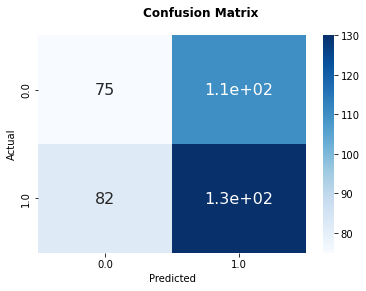

In [242]:
df_cm = pd.DataFrame(
    confusion_matrix(y_test, predictions),
    columns=np.unique(y_test),
    index=np.unique(y_test),
)
df_cm.index.name = "Actual"
df_cm.columns.name = "Predicted"
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16})  # font sizes
plt.suptitle("Confusion Matrix", fontweight="bold", horizontalalignment="center")
plt.show()

### Bayesian Optimization

In [243]:
def stratified_kfold_score_lda(clf, X, y, n_fold):
    strat_kfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=1)
    accuracy_list = cross_val_score(clf, X, y, cv=strat_kfold, scoring='accuracy')
    return np.array(accuracy_list).mean()

# Define the search space for LinearDiscriminantAnalysis hyperparameters
search_spaces_lda = {
    'solver': Categorical(['svd', 'lsqr', 'eigen']),
    'n_components': Categorical([None])
}

# Initialize the Bayesian Optimization with LinearDiscriminantAnalysis and search spaces
lda_bo = BayesSearchCV(
    estimator=LinearDiscriminantAnalysis(),
    search_spaces=search_spaces_lda,
    n_iter=100,  # Number of iterations
    cv=15,  # Cross-validation folds
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Perform the optimization
lda_bo.fit(X_train, y_train)

# You can access the best found parameters and the best score
print("Best parameters found: ", lda_bo.best_params_)
print("Best score found: ", lda_bo.best_score_)

# Calculate accuracy using stratified k-fold cross-validation
clf_lda = LinearDiscriminantAnalysis(**lda_bo.best_params_)
accuracy_lda = stratified_kfold_score_lda(clf_lda, X_train, y_train, n_fold=5)
print("Accuracy using stratified k-fold: ", accuracy_lda)

Best parameters found:  OrderedDict([('n_components', None), ('solver', 'lsqr')])
Best score found:  0.4972270298387479
Accuracy using stratified k-fold:  0.5332021743939824


In [227]:
# Extract the best hyperparameters from Bayesian Optimization results for LinearDiscriminantAnalysis
params_lda = lda_bo.best_params_

# Create Linear Discriminant Analysis model with the best hyperparameters
lda_model = LinearDiscriminantAnalysis(
    solver=params_lda['solver'],
    n_components=params_lda['n_components']
)

# Fit the model to your training data
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(solver='lsqr')

In [229]:
preds = lda_model.predict(X_test)

In [230]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

         0.0       0.54      0.47      0.50       210
         1.0       0.48      0.54      0.51       187

    accuracy                           0.50       397
   macro avg       0.51      0.51      0.50       397
weighted avg       0.51      0.50      0.50       397



In [231]:
print("Precision:{}".format(precision_score(preds, y_test)))
print("Recall:{}".format(recall_score(preds, y_test)))
print("F1 Score:{}".format((f1_score(preds, y_test))))

Precision:0.47641509433962265
Recall:0.5401069518716578
F1 Score:0.5062656641604011


In [233]:
# Define the cross-validation
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
scores_lda = []

# Perform cross-validation
for (train, test), i in zip(cv.split(X_train, y_train), range(5)):
    lda_model.fit(X_train.iloc[train], y_train.iloc[train])
    preds_lda = lda_model.predict(X_train.iloc[test])
    accuracy_lda = accuracy_score(preds_lda, y_train.iloc[test])
    scores_lda.append(accuracy_lda)

# Create a DataFrame to store cross-validation scores
df_val_lda = pd.DataFrame(scores_lda, columns=["Accuracy Test"])
print(
    "KFold validation mean accuracy on test set for LDA: {}".format(
        df_val_lda["Accuracy Test"].mean()
    )
)

KFold validation mean accuracy on test set for LDA: 0.5291773332069151
